# Visualize assessment metrics

The aim of this notebook is to load the assessment metrics and inspect the results. 

### Imports
Import libraries and write settings here.

In [1]:
# OS related
import os
import sys
from pathlib import Path

# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30
pd.options.display.float_format = '{:,.4f}'.format

# autoreload extension
%load_ext autoreload
%autoreload 2

# add repo root path to pythonpath
### Note: this assumes custom python modules are accessible in the root path AND notebooks are in a folder inside root, e.g. root/notebooks
sys.path.insert(0, str(Path.cwd().parent))

In [2]:
from fluocells.config import REPO_PATH

DATASET = "S-BSST265"

results_path = REPO_PATH / "results"

cols = ['experiment', 'F1_score_iou', 'precision_iou', 'recall_iou', 'F1_score_prox',
       'precision_prox', 'recall_prox', 'MAE', 'MedAE', 'MPE']
metrics_df = pd.read_csv(results_path / "all_metrics.csv", names=cols, skiprows=1, header=0)
metrics_df["MPE"] = metrics_df.MPE * 100
metrics_df.head()

,experiment,F1_score_iou,precision_iou,recall_iou,F1_score_prox,precision_prox,recall_prox,MAE,MedAE,MPE
0,"yellow_47_CombinedFT_weights=(0.5, 0.2, 0.5)",0.6473,0.5580,0.7707,0.8011,0.6812,0.9723,2.5000,0.0000,14.7076
1,yellow_79_Focal_gamma=2.0,0.3563,0.5994,0.2535,0.6115,0.9676,0.4470,2.4000,1.0000,24.4358
2,yellow_47_BCE_wcell=100,0.6780,0.5861,0.8041,0.8093,0.6902,0.9781,2.1571,0.5000,21.1164
3,yellow_0_Dice,0.7232,0.6563,0.8053,0.8384,0.7500,0.9504,1.8000,0.0000,10.3319
4,yellow_47_Focal_gamma=2.0,NaN,0.0000,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000


## Aggregate by seed and loss 

In [3]:
def get_loss(row):
    parts = row["experiment"].split('_')
    return "_".join(parts[2:])

def get_seed(row):
    parts = row["experiment"].split('_')
    return parts[1]


metrics_df["aggregator.seed"] = metrics_df.apply(get_seed, axis=1)
metrics_df["aggregator.loss"] = metrics_df.apply(get_loss, axis=1)
metrics_df

,experiment,F1_score_iou,precision_iou,recall_iou,F1_score_prox,precision_prox,recall_prox,MAE,MedAE,MPE,aggregator.seed,aggregator.loss
0,"yellow_47_CombinedFT_weights=(0.5, 0.2, 0.5)",0.6473,0.5580,0.7707,0.8011,0.6812,0.9723,2.5000,0.0000,14.7076,47,"CombinedFT_weights=(0.5, 0.2, 0.5)"
1,yellow_79_Focal_gamma=2.0,0.3563,0.5994,0.2535,0.6115,0.9676,0.4470,2.4000,1.0000,24.4358,79,Focal_gamma=2.0
2,yellow_47_BCE_wcell=100,0.6780,0.5861,0.8041,0.8093,0.6902,0.9781,2.1571,0.5000,21.1164,47,BCE_wcell=100
3,yellow_0_Dice,0.7232,0.6563,0.8053,0.8384,0.7500,0.9504,1.8000,0.0000,10.3319,0,Dice
4,yellow_47_Focal_gamma=2.0,NaN,0.0000,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,47,Focal_gamma=2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
55,"yellow_79_Combined_weights=(0.3, 0.3, 0.4)",0.7071,0.6783,0.7385,0.8205,0.7710,0.8767,1.7143,0.0000,8.1397,79,"Combined_weights=(0.3, 0.3, 0.4)"
56,yellow_5_BCE_wcell=200,0.6788,0.6723,0.6855,0.8471,0.8185,0.8779,2.3857,1.0000,23.4270,5,BCE_wcell=200
57,yellow_5_BCE_wcell=50,0.6850,0.6127,0.7765,0.8322,0.7327,0.9631,2.3143,0.0000,12.6496,5,BCE_wcell=50
58,"yellow_5_CombinedFT_weights=(0.5, 0.2, 0.5)",0.7754,0.7476,0.8053,0.8794,0.8352,0.9286,1.5286,0.0000,6.9290,5,"CombinedFT_weights=(0.5, 0.2, 0.5)"


In [4]:
metrics_df.groupby("aggregator.loss").describe()

F1_score_iou                              \
                                          count   mean    std    min    25%   
aggregator.loss                                                               
BCE_wcell=100                            5.0000 0.6726 0.0165 0.6445 0.6720   
BCE_wcell=200                            5.0000 0.6634 0.0334 0.6059 0.6643   
BCE_wcell=50                             5.0000 0.6871 0.0173 0.6627 0.6827   
CombinedFT_weights=(0.2, 0.5, 0.3)       5.0000 0.7396 0.0294 0.6898 0.7392   
CombinedFT_weights=(0.3, 0.3, 0.4)       5.0000 0.7443 0.0221 0.7207 0.7227   
CombinedFT_weights=(0.5, 0.2, 0.5)       5.0000 0.7277 0.0481 0.6473 0.7290   
Combined_weights=(0.2, 0.5, 0.3)         5.0000 0.7210 0.0234 0.6955 0.7061   
Combined_weights=(0.3, 0.3, 0.4)         5.0000 0.7354 0.0338 0.6919 0.7071   
Combined_weights=(0.5, 0.2, 0.5)         5.0000 0.7417 0.0226 0.7185 0.7258   
Dice                                     5.0000 0.7354 0.0199 0.7154 0.7232   
FT_default                               3.0000 0.7812 0.0020 0.7794 0.7801   
Focal_gamma=2.0                          4.0000 0.6139 0.1742 0.3563 0.5959   

                                                        precision_iou         \
                                      50%    75%    max         count   mean   
aggregator.loss                                                                
BCE_wcell=100                      0.6780 0.6825 0.6859        5.0000 0.6374   
BCE_wcell=200                      0.6776 0.6788 0.6901        5.0000 0.6546   
BCE_wcell=50                       0.6850 0.6951 0.7098        5.0000 0.6187   
CombinedFT_weights=(0.2, 0.5, 0.3) 0.7492 0.7541 0.7657        5.0000 0.6882   
CombinedFT_weights=(0.3, 0.3, 0.4) 0.7493 0.7582 0.7708        5.0000 0.7022   
CombinedFT_weights=(0.5, 0.2, 0.5) 0.7428 0.7442 0.7754        5.0000 0.6774   
Combined_weights=(0.2, 0.5, 0.3)   0.7129 0.7389 0.7515        5.0000 0.6701   
Combined_weights=(0.3, 0.3, 0.4)   0.7498 0.7617 0.7666        5.0000 0.6976   
Combined_weights=(0.5, 0.2, 0.5)   0.7412 0.7461 0.7769        5.0000 0.6876   
Dice                               0.7249 0.7566 0.7571        5.0000 0.6898   
FT_default                         0.7808 0.7821 0.7833        5.0000 0.4675   
Focal_gamma=2.0                    0.6791 0.6971 0.7411        5.0000 0.6133   

                                                                              \
                                      std    min    25%    50%    75%    max   
aggregator.loss                                                                
BCE_wcell=100                      0.0648 0.5593 0.5861 0.6511 0.6707 0.7197   
BCE_wcell=200                      0.0390 0.5884 0.6555 0.6667 0.6723 0.6901   
BCE_wcell=50                       0.0156 0.6050 0.6108 0.6127 0.6199 0.6450   
CombinedFT_weights=(0.2, 0.5, 0.3) 0.0560 0.5927 0.6920 0.7007 0.7197 0.7357   
CombinedFT_weights=(0.3, 0.3, 0.4) 0.0468 0.6372 0.6904 0.6934 0.7270 0.7630   
CombinedFT_weights=(0.5, 0.2, 0.5) 0.0723 0.5580 0.6710 0.6972 0.7135 0.7476   
Combined_weights=(0.2, 0.5, 0.3)   0.0604 0.6018 0.6097 0.6931 0.7135 0.7322   
Combined_weights=(0.3, 0.3, 0.4)   0.0614 0.5983 0.6783 0.7292 0.7372 0.7452   
Combined_weights=(0.5, 0.2, 0.5)   0.0364 0.6391 0.6597 0.7038 0.7099 0.7253   
Dice                               0.0509 0.6330 0.6563 0.6963 0.6964 0.7669   
FT_default                         0.4269 0.0000 0.0000 0.7580 0.7835 0.7957   
Focal_gamma=2.0                    0.3563 0.0000 0.5994 0.8129 0.8228 0.8316   

                                   recall_iou                              \
                                        count   mean    std    min    25%   
aggregator.loss                                                             
BCE_wcell=100                          5.0000 0.7228 0.0660 0.6302 0.6947   
BCE_wcell=200                          5.0000 0.6781 0.0718 0.5634 0.6855   
BCE_wcell=50                           5.0000 0.7735 0.0361 0.

### Visualize

In [5]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

title_dict = {
    "F1_score_iou": "$F_1$ score (segmentation)",
    "F1_score_prox": "$F_1$ score (detection)",
    "MAE": "Mean Absolute Error (counting)",
    "MedAE": "Median Absolute Error (counting)",
    "MPE": "Mean Percentage Error (counting)",
}
xlabels = ['BCE: medium', 'BCE: high', 'BCE: low',
   'CombinedFT: overcrowd',
   'CombinedFT: balanced',
   'CombinedFT: CellViT',
   'Combined: overcrowd',
   'Combined: balanced',
   'Combined: CellViT', 
    'Dice', 'FocalTversky',
   'Focal']

def plot_metrics(metrics_df, metric):
    
    metric_mean = metrics_df.groupby("aggregator.loss")[metric].mean()
    metric_std = metrics_df.groupby("aggregator.loss")[metric].std()

    colors = ['#ffdac1', '#f0f07d', '#c1f0c1', '#99c3ff', 
              '#cfb4d4', '#b7b7a4', '#a0c4ff', '#a7f3d0', 
              '#f7d560', '#6b705c']

    plt.figure(figsize=[6, 4])
    metric_mean.plot(kind='bar', color=colors, edgecolor = "none", yerr=metric_std, capsize=4, width=1)
    plt.xlabel("loss")
    plt.ylabel(r'$F_1$')
    plt.title(title_dict[metric])

    if "F1" in metric:
        plt.ylim(0, 1.0)
        plt.yticks(np.arange(0, 1.1, 0.1))
        
    # Rotate x labels by 30 degrees
    plt.xticks(range(len(xlabels)), xlabels,rotation=80)
#    plt.xlabels(xlabels)
    # Set y grid
    plt.grid(axis='y')
    plt.savefig(results_path / f'{metric}.pdf', transparent=True, bbox_inches='tight')
    plt.show()

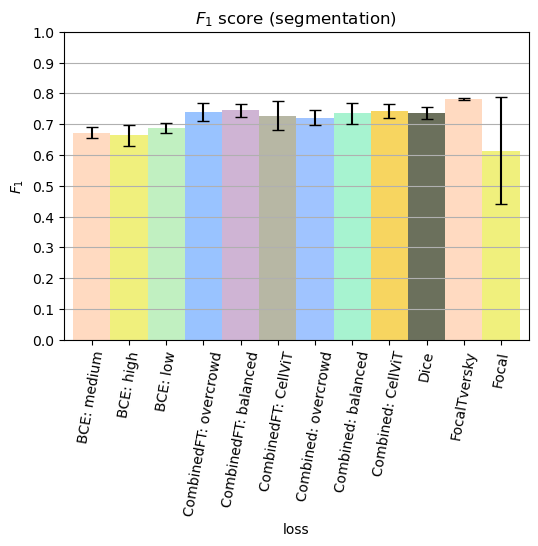

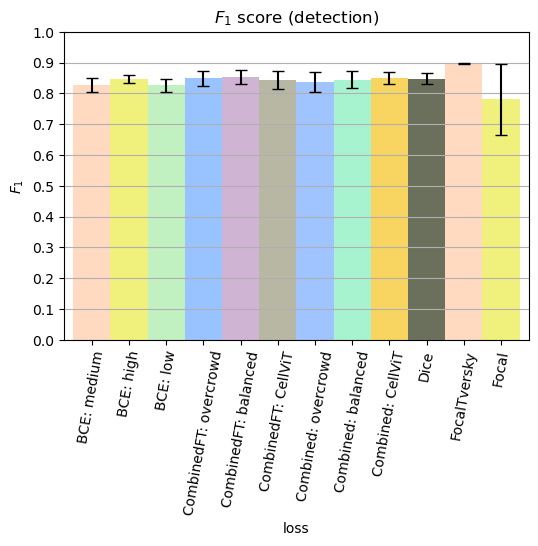

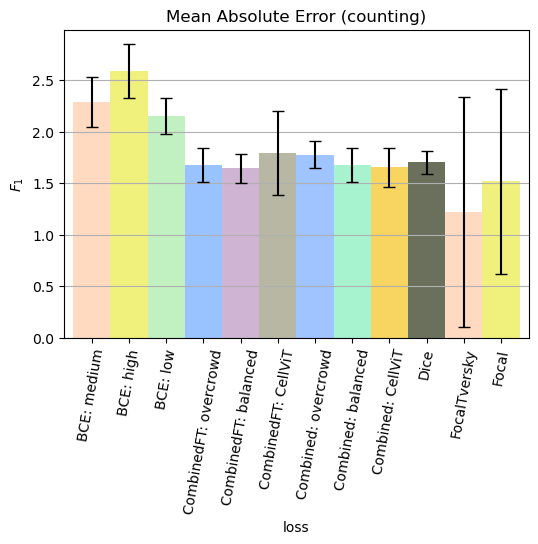

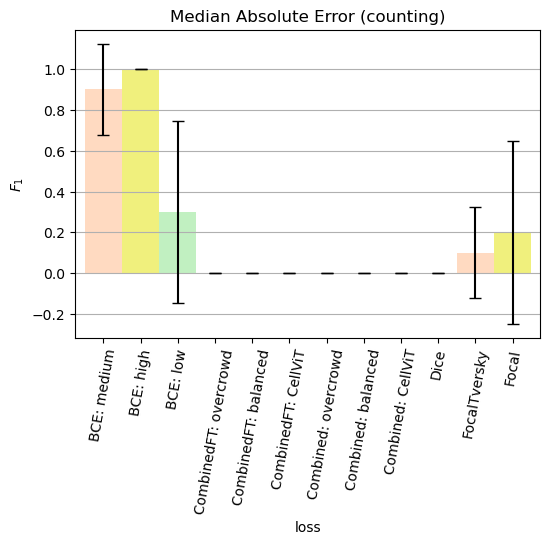

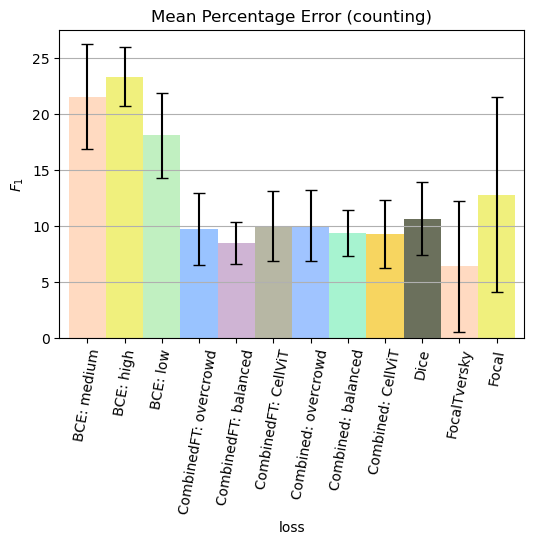

In [6]:
metrics_paper = ["F1_score_iou", "F1_score_prox", "MAE", "MedAE", "MPE"]
for metric in metrics_paper:
        
    plot_metrics(metrics_df, metric)

### Export table 

In [11]:
from itertools import product


agg_metrics = metrics_df.groupby("aggregator.loss").describe()
agg_metrics.index = xlabels

paper_cols = product(metrics_paper, ["mean", "std"])
agg_metrics = agg_metrics[paper_cols]
paper_table = agg_metrics.T
paper_table

BCE: medium  BCE: high  BCE: low  CombinedFT: overcrowd  \
F1_score_iou  mean       0.6726     0.6634    0.6871                 0.7396   
              std        0.0165     0.0334    0.0173                 0.0294   
F1_score_prox mean       0.8266     0.8463    0.8254                 0.8482   
              std        0.0222     0.0132    0.0200                 0.0255   
MAE           mean       2.2857     2.5829    2.1514                 1.6743   
              std        0.2452     0.2625    0.1710                 0.1611   
MedAE         mean       0.9000     1.0000    0.3000                 0.0000   
              std        0.2236     0.0000    0.4472                 0.0000   
MPE           mean      21.4982    23.2807   18.0791                 9.6822   
              std        4.6790     2.6370    3.7913                 3.2209   

                    CombinedFT: balanced  CombinedFT: CellViT  \
F1_score_iou  mean                0.7443               0.7277   
              std                 0.0221               0.0481   
F1_score_prox mean                0.8527               0.8439   
              std                 0.0222               0.0299   
MAE           mean                1.6429               1.7914   
              std                 0.1439               0.4058   
MedAE         mean                0.0000               0.0000   
              std                 0.0000               0.0000   
MPE           mean                8.4648               9.9678   
              std                 1.8589               3.1626   

                    Combined: overcrowd  Combined: balanced  \
F1_score_iou  mean               0.7210              0.7354   
              std                0.0234              0.0338   
F1_score_prox mean               0.8370              0.8448   
              std                0.0329              0.0288   
MAE           mean               1.7743              1.6743   
              std                0.1322              0.1661   
MedAE         mean               0.0000              0.0000   
              std                0.0000              0.0000   
MPE           mean              10.0002              9.3219   
              std                3.1603              2.0742   

                    Combined: CellViT    Dice  FocalTversky   Focal  
F1_score_iou  mean             0.7417  0.7354        0.7812  0.6139  
              std              0.0226  0.0199        0.0020  0.1742  
F1_score_prox mean             0.8490  0.8469        0.8966  0.7803  
              std              0.0200  0.0182        0.0026  0.1145  
MAE           mean             1.6514  1.7000        1.2200  1.5171  
              std              0.1881  0.1125        1.1150  0.8971  
MedAE         mean             0.0000  0.0000        0.1000  0.2000  
              std              0.0000  0.0000        0.2236  0.4472  
MPE           mean             9.2491 10.6213        6.3730 12.7468  
              std              3.0393  3.2470        5.8606  8.7019

In [12]:
# export
paper_table.to_csv(results_path / "metrics_table_paper.csv")
latex_table = paper_table.to_latex(float_format="%.4f")
with open(results_path / 'metrics_table_paper.tex', 'w') as f:
    f.write(latex_table)
latex_table = paper_table.T.to_latex(float_format="%.4f")
with open(results_path / 'metrics_table_paper_experimentbyrow.tex', 'w') as f:
    f.write(latex_table)
    

### wide table 

In [13]:
agg_metrics = metrics_df.groupby("aggregator.loss").describe()
agg_metrics.index = xlabels

paper_cols = product(metrics_paper, ["mean", "std", "25%", "50%","75%"])
paper_table = agg_metrics[paper_cols]
paper_table

F1_score_iou                             F1_score_prox  \
                              mean    std    25%    50%    75%          mean   
BCE: medium                 0.6726 0.0165 0.6720 0.6780 0.6825        0.8266   
BCE: high                   0.6634 0.0334 0.6643 0.6776 0.6788        0.8463   
BCE: low                    0.6871 0.0173 0.6827 0.6850 0.6951        0.8254   
CombinedFT: overcrowd       0.7396 0.0294 0.7392 0.7492 0.7541        0.8482   
CombinedFT: balanced        0.7443 0.0221 0.7227 0.7493 0.7582        0.8527   
CombinedFT: CellViT         0.7277 0.0481 0.7290 0.7428 0.7442        0.8439   
Combined: overcrowd         0.7210 0.0234 0.7061 0.7129 0.7389        0.8370   
Combined: balanced          0.7354 0.0338 0.7071 0.7498 0.7617        0.8448   
Combined: CellViT           0.7417 0.0226 0.7258 0.7412 0.7461        0.8490   
Dice                        0.7354 0.0199 0.7232 0.7249 0.7566        0.8469   
FocalTversky                0.7812 0.0020 0.7801 0.7808 0.7821        0.8966   
Focal                       0.6139 0.1742 0.5959 0.6791 0.6971        0.7803   

                                                     MAE                       \
                         std    25%    50%    75%   mean    std    25%    50%   
BCE: medium           0.0222 0.8093 0.8204 0.8409 2.2857 0.2452 2.1571 2.3000   
BCE: high             0.0132 0.8436 0.8471 0.8552 2.5829 0.2625 2.4000 2.5143   
BCE: low              0.0200 0.8158 0.8280 0.8322 2.1514 0.1710 2.0143 2.2143   
CombinedFT: overcrowd 0.0255 0.8490 0.8555 0.8639 1.6743 0.1611 1.5286 1.7000   
CombinedFT: balanced  0.0222 0.8319 0.8524 0.8718 1.6429 0.1439 1.5714 1.5857   
CombinedFT: CellViT   0.0299 0.8353 0.8398 0.8636 1.7914 0.4058 1.5571 1.6143   
Combined: overcrowd   0.0329 0.8027 0.8439 0.8658 1.7743 0.1322 1.6714 1.7571   
Combined: balanced    0.0288 0.8205 0.8575 0.8669 1.6743 0.1661 1.5571 1.6714   
Combined: CellViT     0.0200 0.8320 0.8495 0.8678 1.6514 0.1881 1.5714 1.6714   
Dice                  0.0182 0.8384 0.8495 0.8554 1.7000 0.1125 1.6286 1.7286   
FocalTversky          0.0026 0.8951 0.8952 0.8974 1.2200 1.1150 0.0000 1.9500   
Focal                 0.1145 0.7676 0.8218 0.8345 1.5171 0.8971 1.6857 1.7286   

                              MedAE                                 MPE  \
                         75%   mean    std    25%    50%    75%    mean   
BCE: medium           2.4857 0.9000 0.2236 1.0000 1.0000 1.0000 21.4982   
BCE: high             2.5857 1.0000 0.0000 1.0000 1.0000 1.0000 23.2807   
BCE: low              2.2857 0.3000 0.4472 0.0000 0.0000 0.5000 18.0791   
CombinedFT: overcrowd 1.7571 0.0000 0.0000 0.0000 0.0000 0.0000  9.6822   
CombinedFT: balanced  1.7857 0.0000 0.0000 0.0000 0.0000 0.0000  8.4648   
CombinedFT: CellViT   1.7571 0.0000 0.0000 0.0000 0.0000 0.0000  9.9678   
Combined: overcrowd   1.8714 0.0000 0.0000 0.0000 0.0000 0.0000 10.0002   
Combined: balanced    1.7143 0.0000 0.0000 0.0000 0.0000 0.0000  9.3219   
Combined: CellViT     1.7000 0.0000 0.0000 0.0000 0.0000 0.0000  9.2491   
Dice                  1.8000 0.0000 0.0000 0.0000 0.0000 0.0000 10.6213   
FocalTversky          2.0500 0.1000 0.2236 0.0000 0.0000 0.0000  6.3730   
Focal                 1.7714 0.2000 0.4472 0.0000 0.0000 0.0000 12.7468   

                                                      
                         std     25%     50%     75%  
BCE: medium           4.6790 20.9296 21.1164 24.7881  
BCE: high             2.6370 21.3903 23.4270 25.5602  
BCE: low              3.7913 15.8800 19.0341 21.4141  
CombinedFT: overcrowd 3.2209  7.7816  8.4691  9.5197  
CombinedFT: balanced  1.8589  7.7562  8.2554  8.9140  
CombinedFT: CellViT   3.1626  7.1968 10.3347 10.6709  
Combined: overcrowd   3.1603  8.0227  8.1792 12.4423  
Combined: balanced    2.0742  8.1397  9.5004  9.9212  
Combined: CellViT     3.0393  6.9632  8.1111 10.3828  
Dice                  3.2470  8.8919 10.3319 10.6856  
FocalTversky          5.8606  0.0000  9.6059 10.6518  


In [14]:
latex_table = paper_table.to_latex(float_format="%.4f")
with open(results_path / 'metrics_table_paper_wide.tex', 'w') as f:
    f.write(latex_table)